# Import Library

In [82]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

# Preprocessing

In [ ]:
data = pd.read_csv("nyc-rolling-sales.csv")
data

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [ ]:
data['BOROUGH'] = data['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})

In [ ]:
data['sale_year'] = pd.DatetimeIndex(data['SALE DATE']).year
data['sale_month'] = pd.DatetimeIndex(data['SALE DATE']).month

In [ ]:
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], errors='coerce')

In [ ]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" ,
           "GROSS SQUARE FEET","SALE PRICE" ]
for col in numeric:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [ ]:
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
               'BUILDING CLASS AT PRESENT','ZIP CODE', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categorical:
    data[col] = data[col].astype(object)

In [ ]:
data.replace(' ',np.nan, inplace=True)

In [ ]:
round(data.isna().sum() /len(data) *100,2)

Unnamed: 0                          0.00
BOROUGH                             0.00
NEIGHBORHOOD                        0.00
BUILDING CLASS CATEGORY             0.00
TAX CLASS AT PRESENT                0.87
BLOCK                               0.00
LOT                                 0.00
EASE-MENT                         100.00
BUILDING CLASS AT PRESENT           0.87
ADDRESS                             0.00
APARTMENT NUMBER                   77.47
ZIP CODE                            0.00
RESIDENTIAL UNITS                   0.00
COMMERCIAL UNITS                    0.00
TOTAL UNITS                         0.00
LAND SQUARE FEET                   31.05
GROSS SQUARE FEET                  32.66
YEAR BUILT                          0.00
TAX CLASS AT TIME OF SALE           0.00
BUILDING CLASS AT TIME OF SALE      0.00
SALE PRICE                         17.22
SALE DATE                           0.00
sale_year                           0.00
sale_month                          0.00
dtype: float64

filter data ini bertujuan untuk menyesuaikan tahun pembangunan properti

# Measures of Central Tendency

In [ ]:
X = data['TOTAL UNITS']
y = data['YEAR BUILT']

In [ ]:
mean_ = sum(y) / len(y)
mean_

1789.322976297488

In [ ]:
wmean = sum(y[i] * X[i] for i in range (len(X))) / sum(y)
print(wmean)

2.3891579143841417


menentukan nilai mean data total unit dengan year
built

# Measure of Central Tendency: Median

In [58]:
X

0         5
1        31
2        17
3        10
4         6
         ..
84543     2
84544     2
84545     2
84546     7
84547     1
Name: TOTAL UNITS, Length: 84548, dtype: int64

In [61]:
statistics.median_low(X[:1])

5

In [62]:
median_ = np.median(y)
print(median_)

1940.0


median untuk melihat nilai awal pada data

#Measure of Central Tendency: Modus

In [65]:
mode_ = statistics.mode(X)
mode_

1

nilai dalam kumpulan data median yang sering muncul

# Measure of Spread: Range

In [66]:
np.ptp(y)

2017

In [68]:
np.ptp(X)

2261

# Measure of Spread: Variance

In [69]:
n = len(X)

mean_ = sum(X) / n

var_ = sum((item - mean_)**2 for item in X) / (n - 1)
var_

359.95896003024995

codingan di atas unutk melakukan mengukur penyebaran data

# Measure of Spread: Standard Deviation

In [71]:
std_ = statistics.stdev(X)
std_

18.97258443202673

standard deviation juga menghitung penyebaran data dengan cara lain

# Probility Distribution

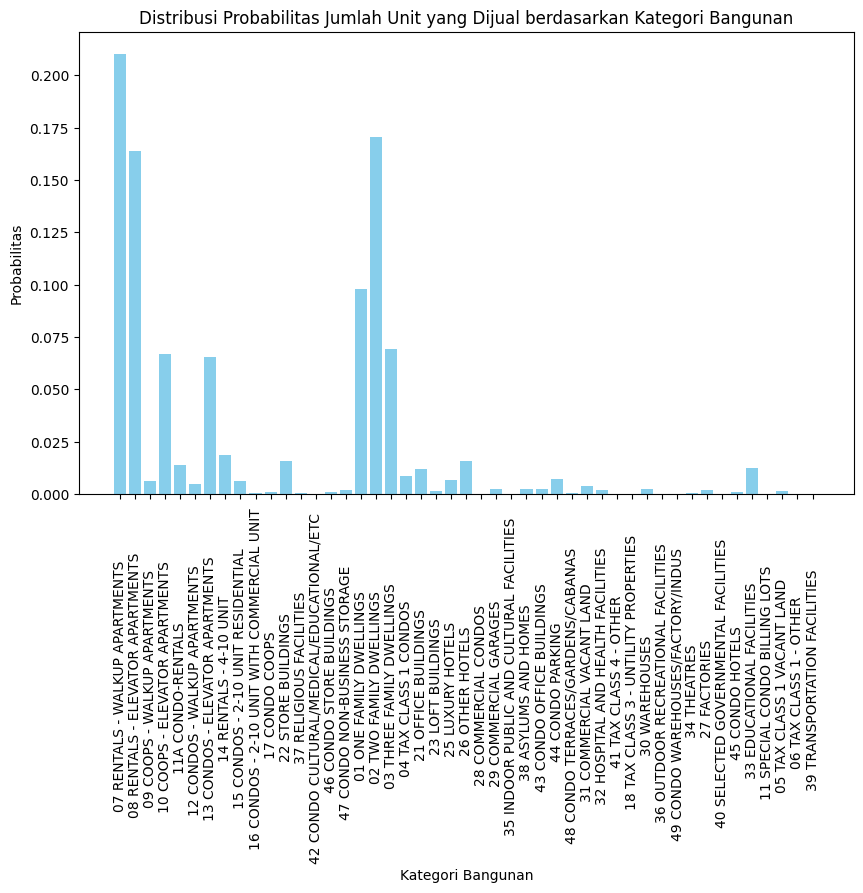

In [72]:
import matplotlib.pyplot as plt

# Pisahkan data berdasarkan kategori bangunan
categories = data['BUILDING CLASS CATEGORY'].unique()

# Siapkan data untuk distribusi probabilitas
category_data = [data[data['BUILDING CLASS CATEGORY'] == category]['TOTAL UNITS'] for category in categories]

# Hitung jumlah total unit untuk setiap kategori
total_units_per_category = [category.sum() for category in category_data]

# Hitung probabilitas untuk setiap kategori
total_units_sum = sum(total_units_per_category)
probability_distribution = [units / total_units_sum for units in total_units_per_category]

# Plot distribusi probabilitas
plt.figure(figsize=(10, 6))
plt.bar(categories, probability_distribution, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Kategori Bangunan')
plt.ylabel('Probabilitas')
plt.title('Distribusi Probabilitas Jumlah Unit yang Dijual berdasarkan Kategori Bangunan')
plt.show()


pertama kita memisahkan ketegori bangunan kemudian melakukan menghitung total unit untuk setiap kategori dan probilitasnya

# confidence interval

In [74]:
# import
from scipy.stats import norm

In [75]:
alpha = 0.5

std_dev = np.std(probability_distribution)
mean = np.mean(probability_distribution)

z_critical = norm.ppf(1 - alpha/2)
margin_of_error = z_critical * (std_dev / np.sqrt(len(probability_distribution)))

lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error
print(f'Confidence interval untuk probabilitas adalah ({lower_bound:.4f}, {upper_bound:.4f})')

Confidence interval untuk probabilitas adalah (0.0167, 0.0259)


kodingan di atas untuk mencari confidence interval untuk probilitas

# Hypothesis Testing

In [87]:
categories = data['BUILDING CLASS CATEGORY'].unique()
category_data = [data[data['BUILDING CLASS CATEGORY'] == category]['TOTAL UNITS'] for category in categories]
alpha = 0.05

statistic, p_value = f_oneway(*category_data)
if p_value < alpha:
    print("Terdapat perbedaan signifikan dalam jumlah total unit antara kategori kelas bangunan.")
else:
    print("Tidak terdapat perbedaan signifikan dalam jumlah total unit antara kategori kelas bangunan.")

Terdapat perbedaan signifikan dalam jumlah total unit antara kategori kelas bangunan.


kodingan di atas untuk memeriksa apakah ada perbedaan signifikasi dari building class category dengan total unit